In [32]:
import pandas as pd
import numpy as np

In [2]:
names1880=pd.read_csv('yob1880.txt',names=['name','sex','birth'])

In [3]:
names1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [10]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']
for year in years:
    path='yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)

In [11]:
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],
            name sex  births  year
 0          Mary   F    8149  1882
 1          Anna   F    3143  1882

In [12]:
names=pd.concat(pieces,ignore_index=True)

In [13]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [17]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

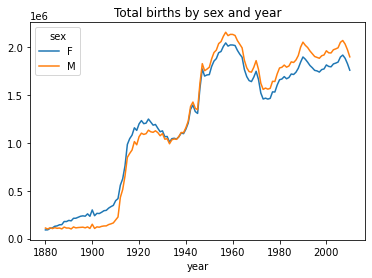

In [18]:
total_births.plot(title='Total births by sex and year')

In [19]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group

In [20]:
names=names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [21]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [25]:
piece=[]
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000=pd.concat(pieces,ignore_index=True)

In [26]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,NaN
1,Anna,F,2604,1880,NaN
2,Emma,F,2003,1880,NaN
3,Elizabeth,F,1939,1880,NaN
4,Minnie,F,1746,1880,NaN
...,...,...,...,...,...
2214533,Camilo,M,194,2010,0.000102
2214534,Destin,M,194,2010,0.000102
2214535,Jaquan,M,194,2010,0.000102
2214536,Jaydan,M,194,2010,0.000102


In [29]:
total_births=top1000.pivot_table('births',index='year',
                                 columns='name',
                                 aggfunc=sum)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

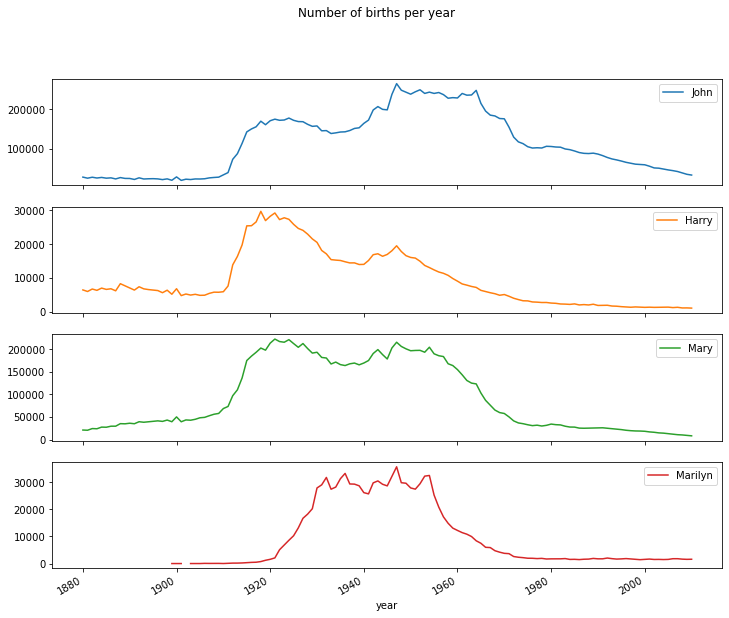

In [30]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,
           title="Number of births per year")

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

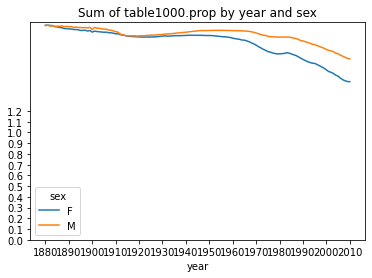

In [36]:
table=top1000.pivot_table('prop',index='year',
                         columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))